## Importing the data

In [33]:
import pandas as pd
insp = pd.read_csv("inspections.csv")
network = pd.read_csv("network.csv")
samplesub = pd.read_csv("sample_submission.csv")

In [44]:
import numpy as np

In [9]:
insp

,PipeId,MaintenanceId,InspectionYear,InspectionDate,MonthsLastRev,Severity,Incidence
0,189311802,ZRV-00001972,2010,2010-10-01,24,4,0
1,188889914,ZRV-00001406,2010,2010-10-01,22,4,0
2,188889907,ZRV-00001406,2010,2010-10-01,22,4,0
3,188673355,ZRV-00001406,2010,2010-10-01,22,4,0
4,188558922,ZRV-00001406,2010,2010-10-01,22,4,0
...,...,...,...,...,...,...,...
6345339,280560178,ZRV-00002112,2021,2020-12-31,23,4,0
6345340,274990683,ZRV-00002112,2021,2020-12-31,23,4,0
6345341,280560172,ZRV-00002112,2021,2020-12-31,23,4,0
6345342,274990921,ZRV-00002112,2021,2020-12-31,23,4,0


## Merging the datasets

In [34]:
data = insp.merge(network, how='inner', on='PipeId')

data

,PipeId,MaintenanceId,InspectionYear,InspectionDate,MonthsLastRev,Severity,Incidence,Province,Town,YearBuilt,Material,GasType,Diameter,Length,Pressure,NumConnections,NumConnectionsUnder,BoolBridle
0,189311802,ZRV-00001972,2010,2010-10-01,24,4,0,Barcelona,Sentmenat,2001,PE,Gas natural,160.0,117.831,4.000,0,0,False
1,189311802,ZRV-00001972,2012,2012-10-01,24,4,0,Barcelona,Sentmenat,2001,PE,Gas natural,160.0,117.831,4.000,0,0,False
2,189311802,ZRV-00001972,2014,2014-10-08,24,4,0,Barcelona,Sentmenat,2001,PE,Gas natural,160.0,117.831,4.000,0,0,False
3,189311802,ZRV-00001972,2016,2016-10-14,24,4,0,Barcelona,Sentmenat,2001,PE,Gas natural,160.0,117.831,4.000,0,0,False
4,189311802,ZRV-00001972,2018,2018-10-09,24,4,0,Barcelona,Sentmenat,2001,PE,Gas natural,160.0,117.831,4.000,0,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6345339,56922448,ZRV-00004581,2020,2020-12-31,24,4,0,Valencia,Betera,1993,PE,Gas natural,63.0,1.237,4.000,0,0,False
6345340,56907425,ZRV-00004581,2020,2020-12-31,24,4,0,Valencia,Betera,2000,PE,Gas natural,160.0,169.732,4.000,1,0,False
6345341,7843615,ZRV-00002112,2021,2020-12-31,24,4,0,Barcelona,Sabadell,1995,FD,Gas natural,150.0,0.361,0.025,0,0,True
6345342,56922456,ZRV-00004581,2020,2020-12-31,24,4,0,Valencia,Betera,1993,PE,Gas natural,63.0,23.306,4.000,0,0,False


In [12]:
unique_values = data['GasType'].unique()
unique_values

array(['Gas natural', 'Gas propano'], dtype=object)

In [54]:
data.loc[:, 'volumetesttest'] = (3.14/4) * ((data['Diameter']/10).apply(np.sqrt)) * (data['Pressure']/8.314*298.15) * 0.8

In [42]:
data.loc[:, 'diam'] = (data['Diameter']/10)

In [48]:






#data.loc[:, 'volume'] = (3.14/4) *  (data['Pressure']/8.314*298.15) * 0.8


#df['sqrt_A'] = df['A'].apply(np.sqrt)



#data.loc[:, 'volfin'] = data['volume'] * ((data['Diameter']/10)^2/4) 


#data.loc[:, 'diam'] = (data['Diameter']/10)

#data.loc[:, 'volfin'] = data['volume'] * (data['diam'].apply(np.sqrt)) 
data.loc[:, 'volfinal']= data['volfin']/100

#data = data.assign(volume = (3.14/4) * ((data['Diameter']/10)^1/2) * (data['Pressure']/8.314*298.15) * 0.8)

In [46]:
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 6345344 entries, 0 to 6345343
Data columns (total 21 columns):
 #   Column               Dtype  
---  ------               -----  
 0   PipeId               int64  
 1   MaintenanceId        object 
 2   InspectionYear       int64  
 3   InspectionDate       object 
 4   MonthsLastRev        int64  
 5   Severity             int64  
 6   Incidence            int64  
 7   Province             object 
 8   Town                 object 
 9   YearBuilt            int64  
 10  Material             object 
 11  GasType              object 
 12  Diameter             float64
 13  Length               float64
 14  Pressure             float64
 15  NumConnections       int64  
 16  NumConnectionsUnder  int64  
 17  BoolBridle           bool   
 18  volume               float64
 19  diam                 float64
 20  volfin               float64
dtypes: bool(1), float64(6), int64(8), object(6)
memory usage: 1022.7+ MB


In [50]:
price1= 2.37

In [52]:
data.loc[:, 'volfinal']= (data['volfinal']/2.244)*price1

In [55]:
data

,PipeId,MaintenanceId,InspectionYear,InspectionDate,MonthsLastRev,Severity,Incidence,Province,Town,YearBuilt,...,Length,Pressure,NumConnections,NumConnectionsUnder,BoolBridle,volume,diam,volfin,volfinal,volumetesttest
0,189311802,ZRV-00001972,2010,2010-10-01,24,4,0,Barcelona,Sentmenat,2001,...,117.831,4.000,0,0,False,90.083329,16.0,360.333317,3.805659,360.333317
1,189311802,ZRV-00001972,2012,2012-10-01,24,4,0,Barcelona,Sentmenat,2001,...,117.831,4.000,0,0,False,90.083329,16.0,360.333317,3.805659,360.333317
2,189311802,ZRV-00001972,2014,2014-10-08,24,4,0,Barcelona,Sentmenat,2001,...,117.831,4.000,0,0,False,90.083329,16.0,360.333317,3.805659,360.333317
3,189311802,ZRV-00001972,2016,2016-10-14,24,4,0,Barcelona,Sentmenat,2001,...,117.831,4.000,0,0,False,90.083329,16.0,360.333317,3.805659,360.333317
4,189311802,ZRV-00001972,2018,2018-10-09,24,4,0,Barcelona,Sentmenat,2001,...,117.831,4.000,0,0,False,90.083329,16.0,360.333317,3.805659,360.333317
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6345339,56922448,ZRV-00004581,2020,2020-12-31,24,4,0,Valencia,Betera,1993,...,1.237,4.000,0,0,False,90.083329,6.3,226.107362,2.388032,226.107362
6345340,56907425,ZRV-00004581,2020,2020-12-31,24,4,0,Valencia,Betera,2000,...,169.732,4.000,1,0,False,90.083329,16.0,360.333317,3.805659,360.333317
6345341,7843615,ZRV-00002112,2021,2020-12-31,24,4,0,Barcelona,Sabadell,1995,...,0.361,0.025,0,0,True,0.563021,15.0,2.180570,0.023030,2.180570
6345342,56922456,ZRV-00004581,2020,2020-12-31,24,4,0,Valencia,Betera,1993,...,23.306,4.000,0,0,False,90.083329,6.3,226.107362,2.388032,226.107362


In [35]:
condition = data['Incidence'] == 1
result = data[condition]
result

,PipeId,MaintenanceId,InspectionYear,InspectionDate,MonthsLastRev,Severity,Incidence,Province,Town,YearBuilt,Material,GasType,Diameter,Length,Pressure,NumConnections,NumConnectionsUnder,BoolBridle
111,188889938,ZRV-00001406,2015,2015-11-06,24,3,1,Barcelona,Barcelona,1999,PE,Gas natural,160.0,77.024000,0.025,5,0,False
191,188909811,ZRV-00001406,2019,2019-11-28,24,1,1,Barcelona,Barcelona,1999,PE,Gas natural,200.0,34.436000,0.025,4,0,False
427,189128842,ZRV-00001406,2011,2011-11-17,13,3,1,Barcelona,Barcelona,1999,PE,Gas natural,110.0,133.535000,0.025,8,0,False
493,190974619,ZRV-00001406,2011,2011-11-17,13,3,1,Barcelona,Barcelona,1976,FD,Gas natural,150.0,118.307000,0.025,6,0,True
831,190451168,ZRV-00001406,2015,2015-11-04,24,3,1,Barcelona,Barcelona,2003,PE,Gas natural,250.0,82.239000,0.025,8,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6344983,54530214,ZRV-00003663,2020,2020-12-15,0,1,1,Barcelona,Rubi,2015,PE,Gas natural,63.0,806.904000,4.000,17,0,False
6344984,183236393,ZRV-00007660,2020,2020-12-15,0,3,1,Palencia,Grijota,2020,PE,Gas propano,32.0,155.773000,1.700,14,0,False
6345179,191536412,ZRV-00002166,2020,2020-12-22,24,2,1,Barcelona,Premia de Dalt,1956,PA,Gas natural,70.0,151.293533,0.025,0,0,True
6345247,54936174,ZRV-00001975,2020,2020-12-23,24,2,1,Barcelona,Corbera de Llobregat,2018,PN,Gas natural,90.0,1.841000,0.150,1,0,True


In [49]:
data

,PipeId,MaintenanceId,InspectionYear,InspectionDate,MonthsLastRev,Severity,Incidence,Province,Town,YearBuilt,...,Diameter,Length,Pressure,NumConnections,NumConnectionsUnder,BoolBridle,volume,diam,volfin,volfinal
0,189311802,ZRV-00001972,2010,2010-10-01,24,4,0,Barcelona,Sentmenat,2001,...,160.0,117.831,4.000,0,0,False,90.083329,16.0,360.333317,3.603333
1,189311802,ZRV-00001972,2012,2012-10-01,24,4,0,Barcelona,Sentmenat,2001,...,160.0,117.831,4.000,0,0,False,90.083329,16.0,360.333317,3.603333
2,189311802,ZRV-00001972,2014,2014-10-08,24,4,0,Barcelona,Sentmenat,2001,...,160.0,117.831,4.000,0,0,False,90.083329,16.0,360.333317,3.603333
3,189311802,ZRV-00001972,2016,2016-10-14,24,4,0,Barcelona,Sentmenat,2001,...,160.0,117.831,4.000,0,0,False,90.083329,16.0,360.333317,3.603333
4,189311802,ZRV-00001972,2018,2018-10-09,24,4,0,Barcelona,Sentmenat,2001,...,160.0,117.831,4.000,0,0,False,90.083329,16.0,360.333317,3.603333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6345339,56922448,ZRV-00004581,2020,2020-12-31,24,4,0,Valencia,Betera,1993,...,63.0,1.237,4.000,0,0,False,90.083329,6.3,226.107362,2.261074
6345340,56907425,ZRV-00004581,2020,2020-12-31,24,4,0,Valencia,Betera,2000,...,160.0,169.732,4.000,1,0,False,90.083329,16.0,360.333317,3.603333
6345341,7843615,ZRV-00002112,2021,2020-12-31,24,4,0,Barcelona,Sabadell,1995,...,150.0,0.361,0.025,0,0,True,0.563021,15.0,2.180570,0.021806
6345342,56922456,ZRV-00004581,2020,2020-12-31,24,4,0,Valencia,Betera,1993,...,63.0,23.306,4.000,0,0,False,90.083329,6.3,226.107362,2.261074


In [39]:
results2= result.groupby('Province').size().reset_index(name='count')
results2

,Province,count
0,Albacete,28
1,Alicante,143
2,Almeria,25
3,Avila,1
4,Barcelona,3520
5,Burgos,125
6,Castellón,112
7,Ciudad Real,110
8,Cuenca,46
9,Cádiz,19


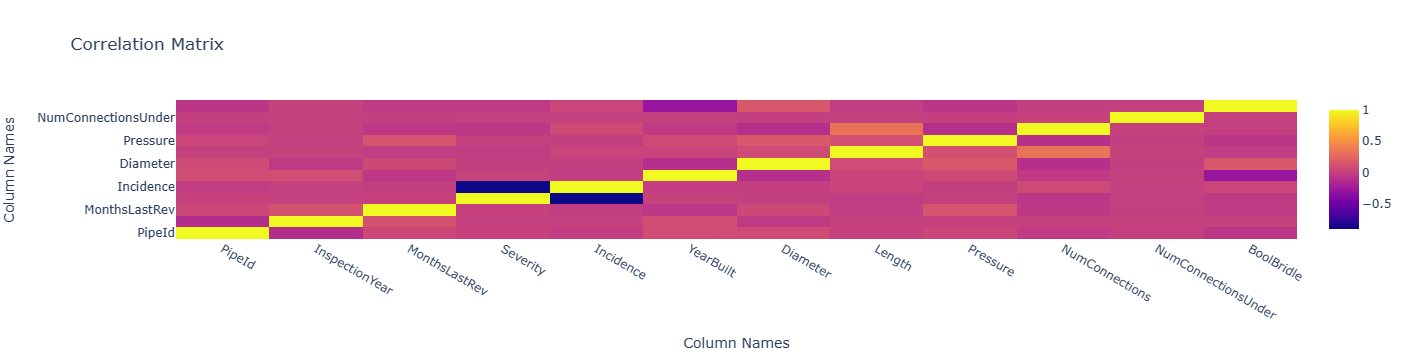

In [11]:
import plotly.graph_objects as go
import plotly.offline as pyo
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = data.corr()

heatmap_trace = go.Heatmap(z=corr_matrix.values,
                           x=corr_matrix.index.values,
                           y=corr_matrix.columns.values)

layout = go.Layout(title='Correlation Matrix',
                   xaxis=dict(title='Column Names'),
                   yaxis=dict(title='Column Names'))

fig = go.Figure(data=[heatmap_trace], layout=layout)



# Display figure
pyo.iplot(fig)

In [5]:
contingency_table = pd.crosstab(index=data['Incidence'],columns=[data['Province'], data['Town'], data['Material'],data['GasType']])
corr_matrix_c = contingency_table.corr()

In [ ]:
sns.heatmap(corr_matrix_c, annot=True, cmap='coolwarm')


KeyboardInterrupt



In [6]:
print(corr_matrix_c)

Province                                  Albacete                          \
Town                                      Albacete                           
Material                                        AO                      CU   
GasType                                Gas natural Gas propano Gas natural   
Province Town     Material GasType                                           
Albacete Albacete AO       Gas natural         1.0         1.0         1.0   
                           Gas propano         1.0         1.0         1.0   
                  CU       Gas natural         1.0         1.0         1.0   
                           Gas propano         1.0         1.0         1.0   
                  PE       Gas natural         1.0         1.0         1.0   
...                                            ...         ...         ...   
Zaragoza Zaida    AO       Gas natural         1.0         1.0         1.0   
         Zaragoza AO       Gas natural         1.0         1.0  

In [12]:
print(corr_matrix)

                       PipeId  InspectionYear  MonthsLastRev  Severity  \
PipeId               1.000000       -0.123868       0.048799  0.017614   
InspectionYear      -0.123868        1.000000       0.117585  0.001188   
MonthsLastRev        0.048799        0.117585       1.000000  0.011268   
Severity             0.017614        0.001188       0.011268  1.000000   
Incidence           -0.021449       -0.000359      -0.013749 -0.904174   
YearBuilt            0.086948        0.090337      -0.056517  0.019155   
Diameter             0.076355       -0.045081       0.061617 -0.001891   
Length               0.006344        0.013303      -0.017742 -0.022102   
Pressure             0.043180        0.001365       0.134316  0.006953   
NumConnections      -0.034327        0.008363      -0.051278 -0.060013   
NumConnectionsUnder -0.004930        0.004977      -0.003140  0.000097   
BoolBridle          -0.062478        0.015323      -0.031134 -0.037030   

                     Incidence  YearB

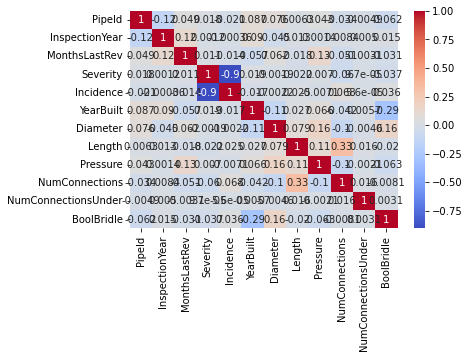

In [13]:
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

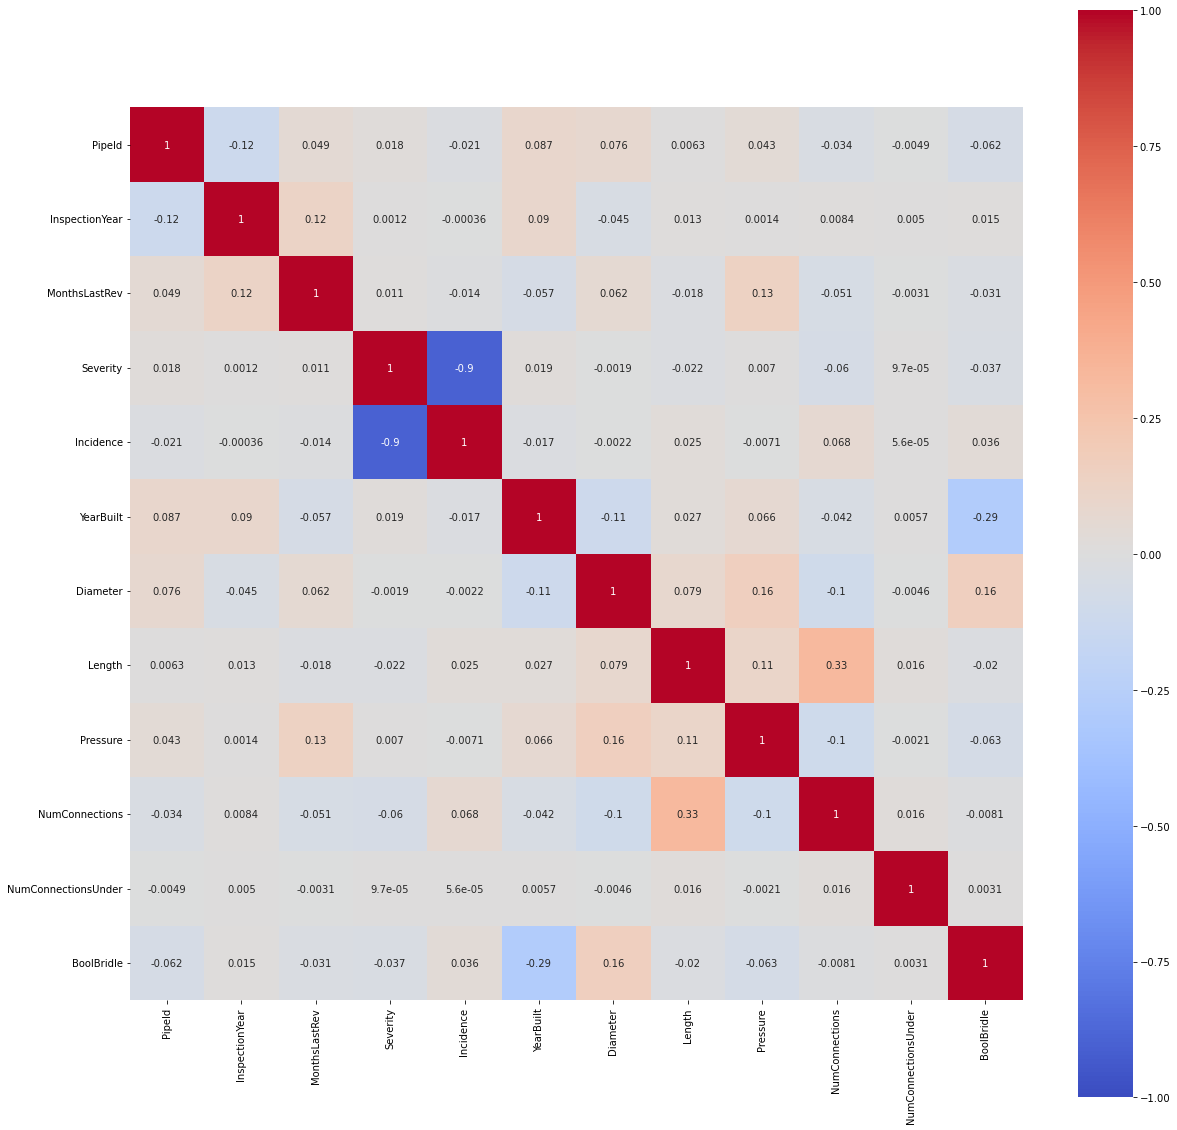

In [15]:
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True, ax=ax, vmin=-1, vmax=1)
plt.show()

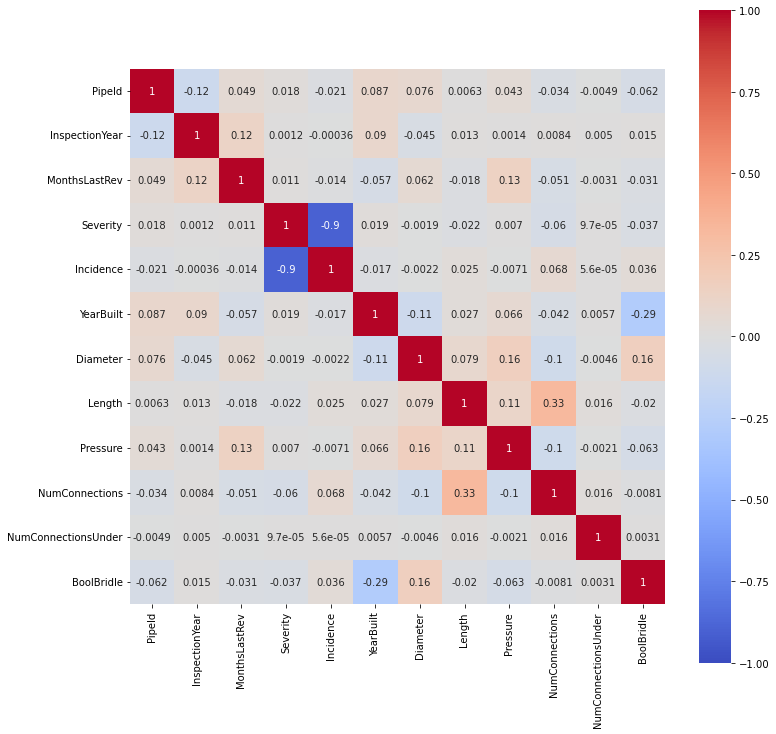

In [16]:
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True, ax=ax, vmin=-1, vmax=1)
plt.show()

In [15]:
data = data.drop(columns=['MaintenanceId', 'InspectionDate', 'Town'])

df = pd.get_dummies(data['Province'])

# join the encoded dataframe with original dataframe
data = data.join(df)

df1 = pd.get_dummies(data['GasType'])

# join the encoded dataframe with original dataframe
data = data.join(df1)

df2 = pd.get_dummies(data['BoolBridle'])

# join the encoded dataframe with original dataframe
data = data.join(df2)

df3 = pd.get_dummies(data['Material'])

# join the encoded dataframe with original dataframe
data = data.join(df3)

data = data.drop(columns=['GasType', 'BoolBridle', 'Material',])

In [16]:
data

,PipeId,InspectionYear,MonthsLastRev,Severity,Incidence,Province,YearBuilt,Diameter,Length,Pressure,...,CU,FD,FG,FI,FO,PA,PE,PN,PV,ZD
0,189311802,2010,24,4,0,Barcelona,2001,160.0,117.831,4.000,...,0,0,0,0,0,0,1,0,0,0
1,189311802,2012,24,4,0,Barcelona,2001,160.0,117.831,4.000,...,0,0,0,0,0,0,1,0,0,0
2,189311802,2014,24,4,0,Barcelona,2001,160.0,117.831,4.000,...,0,0,0,0,0,0,1,0,0,0
3,189311802,2016,24,4,0,Barcelona,2001,160.0,117.831,4.000,...,0,0,0,0,0,0,1,0,0,0
4,189311802,2018,24,4,0,Barcelona,2001,160.0,117.831,4.000,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6345339,56922448,2020,24,4,0,Valencia,1993,63.0,1.237,4.000,...,0,0,0,0,0,0,1,0,0,0
6345340,56907425,2020,24,4,0,Valencia,2000,160.0,169.732,4.000,...,0,0,0,0,0,0,1,0,0,0
6345341,7843615,2021,24,4,0,Barcelona,1995,150.0,0.361,0.025,...,0,1,0,0,0,0,0,0,0,0
6345342,56922456,2020,24,4,0,Valencia,1993,63.0,23.306,4.000,...,0,0,0,0,0,0,1,0,0,0


In [17]:
finalsub = samplesub.merge(network, how='inner', on='PipeId')
finalsub

keep_columns_sub = ['YearBuilt', 'Diameter', 'Length', 'Pressure', 'NumConnections', 'NumConnectionsUnder']
finalsub_simple = finalsub[keep_columns_sub]
finalsub_simple
finalsub

,PipeId,Incidence,Province,Town,YearBuilt,Material,GasType,Diameter,Length,Pressure,NumConnections,NumConnectionsUnder,BoolBridle
0,446859944,0,Valencia,Alginet,2012,PE,Gas natural,110.0,44.286,0.150,0,0,False
1,428124500,0,Valencia,Alginet,2012,PE,Gas natural,160.0,110.715,0.150,2,0,False
2,438428871,0,Valencia,Alginet,2012,PE,Gas natural,110.0,13.575,0.150,0,0,False
3,429034569,0,Valencia,Alginet,2012,PE,Gas natural,110.0,327.689,0.150,3,0,False
4,411184477,0,Valencia,Alginet,2007,PE,Gas natural,200.0,932.762,0.150,0,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
909728,235426649,0,Valencia,Paterna,2004,PE,Gas natural,110.0,7.656,0.025,0,0,False
909729,235426673,0,Valencia,Paterna,2004,PE,Gas natural,110.0,4.383,0.025,2,0,False
909730,235426707,0,Valencia,Paterna,2004,PE,Gas natural,110.0,2.292,0.025,1,0,False
909731,190956601,0,Valencia,Paterna,2004,PE,Gas natural,90.0,87.809,4.000,0,0,False


## EDA

Counting the number of 0 and 1 and the rate

In [30]:
ones = (insp['Incidence'] == 1).sum()
ceros = (insp['Incidence'] == 0).sum()
rate = ones/len(insp) *100
print(str(round(rate,2))+'% of positive records')
ones

0.19% of positive records


12328

In [24]:
network.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1446539 entries, 0 to 1446538
Data columns (total 12 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   PipeId               1446539 non-null  int64  
 1   Province             1446539 non-null  object 
 2   Town                 1446539 non-null  object 
 3   YearBuilt            1446539 non-null  int64  
 4   Material             1446539 non-null  object 
 5   GasType              1446539 non-null  object 
 6   Diameter             1446539 non-null  float64
 7   Length               1446539 non-null  float64
 8   Pressure             1446539 non-null  float64
 9   NumConnections       1446539 non-null  int64  
 10  NumConnectionsUnder  1446539 non-null  int64  
 11  BoolBridle           1446539 non-null  bool   
dtypes: bool(1), float64(3), int64(4), object(4)
memory usage: 122.8+ MB


In [25]:
samplesub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 909733 entries, 0 to 909732
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   PipeId     909733 non-null  int64
 1   Incidence  909733 non-null  int64
dtypes: int64(2)
memory usage: 13.9 MB


## Modeling

In [26]:
""" from sklearn.model_selection import train_test_split
from lazypredict.Supervised import LazyClassifier


X_train, X_test, y_train, y_test = train_test_split(data.loc[:, data.columns != "Incidence"], data["Incidence"], test_size=0.25, random_state=42)

clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)

print(models) """

' from sklearn.model_selection import train_test_split\nfrom lazypredict.Supervised import LazyClassifier\n\n\nX_train, X_test, y_train, y_test = train_test_split(data.loc[:, data.columns != "Incidence"], data["Incidence"], test_size=0.25, random_state=42)\n\nclf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)\nmodels,predictions = clf.fit(X_train, X_test, y_train, y_test)\n\nprint(models) '

In [27]:
keep_columns = ['YearBuilt', 'Diameter', 'Length', 'Pressure', 'NumConnections', 'NumConnectionsUnder','Incidence']
data_simple_for_logistic = data[keep_columns]

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_simple_for_logistic.loc[:, data_simple_for_logistic.columns != "Incidence"], data_simple_for_logistic["Incidence"], test_size=0.25, random_state=42)

# Making the small balanced 

In [34]:
df = data_simple_for_logistic
df = df.sample(frac=1)
fraud_df = df.loc[df['Incidence'] == 1]
non_fraud_df = df.loc[df['Incidence'] == 0][:12328]
normal_distributed_df = pd.concat([fraud_df, non_fraud_df])
new_df = normal_distributed_df.sample(frac=1, random_state=42)
new_df.sample(3)

,YearBuilt,Diameter,Length,Pressure,NumConnections,NumConnectionsUnder,Incidence
6092245,1999,40.0,266.055,1.7,12,0,1
4813440,1981,203.2,265.631,16.0,0,0,0
3783668,2008,160.0,24.068,4.0,0,0,0


In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import roc_auc_score

X_train, X_test, y_train, y_test = train_test_split(new_df.loc[:, new_df.columns != "Incidence"], new_df["Incidence"], test_size=0.25, random_state=42)

# Convert the training and test sets into DMatrix objects for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Define the grid of hyperparameters to search
params = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.2, 0.3],
    'n_estimators': [100, 200, 300]
}

# Perform grid search with cross-validation
xgb_clf = xgb.XGBClassifier()
grid_search = GridSearchCV(xgb_clf, params, cv=5, scoring='roc_auc')
grid_search.fit(X_train, y_train)

# Print the best parameters and the best AUC score
print("Best parameters: ", grid_search.best_params_)
print("Best AUC score: ", grid_search.best_score_)

# Evaluate the model on the test set
y_pred = grid_search.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_pred)
print("Test set AUC: ", auc)

results_1 = grid_search.predict(finalsub_simple)

Best parameters:  {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}
Best AUC score:  0.8934023457746235
Test set AUC:  0.8953290909617476


In [ ]:
samplesub

,PipeId,Incidence
0,446859944,0
1,428124500,0
2,438428871,0
3,429034569,0
4,411184477,0
...,...,...
909728,235426649,0
909729,235426673,0
909730,235426707,0
909731,190956601,0


In [37]:
results1df = pd.DataFrame(results_1)

In [38]:
results1df = pd.DataFrame(results_1)

samplesub_sub = samplesub.drop(columns = "Incidence")

finalfinal = samplesub_sub.merge(results1df, left_index = True,right_index=True)
finalfinal.rename(columns={0: "Incidence"}, inplace=True)
finalfinal

,PipeId,Incidence
0,446859944,0
1,428124500,0
2,438428871,0
3,429034569,0
4,411184477,0
...,...,...
909728,235426649,0
909729,235426673,0
909730,235426707,0
909731,190956601,0


In [39]:
import numpy as np
finalfinal.to_csv("XGBoostCV.csv", index=False)